<a href="https://colab.research.google.com/github/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/blob/main/Final_Project_Data_Mining_Kelompok_Erupsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT DATA MINING - KELOMPOK ERUPSI**


Pada final project ini, kelompok kami melakukan proses Data Mining pada data tweet dengan keyword "erupsi" dan keyword - keyword lainnya dengan arti yang serupa. Berdasarkan proses data mining yang dilakukan, dengan tujuan mengumpulkan informasi / insight yang diharapkan dapat berguna secara luas.

Final project ini dibuat dalam rangka pemenuhan ujian akhir semester mata kuliah Data Mining dengan dosen pengajar yaitu pak Taufik Edy Sutanto, Ph.D.

# Kelompok Erupsi:
Ketua Kelompok  : Asita Darma Irawati, 1806186982

Anggota Kelompok:

Geraldine Immanuel  Tangyong, 1806193615

Gabriela P. W. Gracia, 1806193590

Silvia, 1806232061

## **Crawling Data**

Pada bagian pertama ini, dilakukan proses crawling data tweet Twitter yang ditarik dengan bantuan Twitter API. Tweet ditarik berdasarkan pada keyword "erupsi", kemudian keyword diperluas menjadi: "erupsi", "gunung meletus", "semburan gunung", "semeru", dan "semeru erupsi". Proses penarikan data dilakukan pada tanggal 16 - 17 Desember 2021. 



Untuk setiap keyword, dilakukan penarikan data berdasarkan algoritma dibawah ini. Definisikan keyword sebagai search_key dan definisikan nama file sebagai nama_file.

Informasi yang dikumpulkan untuk setiap tweet adalah mengenai isi tweet, tanggal dibuat tweet, jumlah likes, dan jumlah retweet.

In [ ]:
import tweepy
import csv

api_key = 'nZAunzCRkIfwY3U3awdLfUzd6'
api_key_secret = 'Bm1ojdumaOmPuUwLXjJZieeDSOL6YeBDCVkShE52ZZbSBGVvYM'
access_token = '1348194120582381570-5vehUcw0MfjAEwr5ioKI3K7ePF83jK'
access_token_secret = 'D4SMA8BNfabRZjdIkMku7tJ8Xuat6Wb3eNBNDcs9XjGgz'

tweetsPerQry = 100
maxTweets = 300000
nama_file = 'gunungmeletus_17122021' #masukkan nama file disini
search_key = "gunung meletus" #masukkan keyword disini
maxId = -1
tweetCount = 0

authentication = tweepy.OAuthHandler(api_key, api_key_secret)
authentication.set_access_token(access_token, access_token_secret)
api = tweepy.API(authentication, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

while tweetCount < maxTweets:
    if maxId <= 0 :
        newTweets = api.search(q=search_key, count=tweetsPerQry, result_type="recent", tweet_mode = "extended")
    
    newTweets = api.search(q=search_key, count=tweetsPerQry, result_type="recent", tweet_mode = "extended", max_id=str(maxId-1))

    if not newTweets :
        print("Tweet Habis")
        break

    for tweet in newTweets:
        dictTweet = {
            "created_at" : tweet.created_at,
            "tweet" : tweet.full_text.encode('utf-8'),
            "favorite_count" : tweet.favorite_count,
            "retweet_count" : tweet.retweet_count
        }
        # print("Username {username} : {tweet}".format(username=dictTweet["username"], tweet=dictTweet["tweet"]))
        with open(nama_file+".csv", 'a+', newline='') as csv_file:
            fieldNames = ["created_at", "tweet", "favorite_count", "retweet_count"] #tanggal dibuat tweet, isi tweet, jumlah likes, dan jumlah retweet
            writer = csv.DictWriter(csv_file, fieldnames = fieldNames, delimiter=";",)
            writer.writerow(dictTweet)

    tweetCount += len(newTweets)	
    maxId = newTweets[-1].id

Tweet Habis


Dari proses crawling tersebut, diperoleh 6 data raw yang disimpan dalam format csv, yaitu:

1. erupsi.csv
2. erupsi_17122021.csv
3. gunungmeletus_17122021.csv
4. semburangunung_17122021.csv
5. semeru_17122021.csv
6. semeruerupsi_17122021.csv

Data tersebut dapat di akses di repository Github final project ini, tepatnya di folder "raw data".
Tautan mengakses: https://github.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/tree/main/raw%20data

In [ ]:
import pandas as pd

erupsi = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/erupsi.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])
erupsi_17 = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/erupsi_17122021.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])
gunungmeletus = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/gunungmeletus_17122021.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])
semburangunung = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/semburangunung_17122021.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])
semeru = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/semeru_17122021.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])
semeruerupsi = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/semeruerupsi_17122021.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/raw%20data/erupsi.csv', encoding ='utf-8',sep=';', names=['created_at','tweet','favorites_count','retweet_count'])

created_at  ... retweet_count
0      2021-12-16 14:12:19  ...             0
1      2021-12-16 14:11:43  ...             0
2      2021-12-16 14:10:00  ...             0
3      2021-12-16 14:09:02  ...             0
4      2021-12-16 14:07:32  ...             0
...                    ...  ...           ...
16685  2021-12-13 16:37:19  ...             0
16686  2021-12-13 16:36:58  ...             1
16687  2021-12-13 16:36:56  ...             0
16688  2021-12-13 16:36:46  ...             0
16689  2021-12-13 16:36:37  ...             0

[16690 rows x 4 columns]

Berikut merupakan cuplikan masing - masing data hasil crawling

In [ ]:
erupsi.head()

created_at  ... retweet_count
0  2021-12-16 14:12:19  ...             0
1  2021-12-16 14:11:43  ...             0
2  2021-12-16 14:10:00  ...             0
3  2021-12-16 14:09:02  ...             0
4  2021-12-16 14:07:32  ...             0

[5 rows x 4 columns]

In [ ]:
erupsi_17.head()

created_at  ... retweet_count
0  2021-12-17 07:51:22  ...             2
1  2021-12-17 07:50:51  ...             2
2  2021-12-17 07:46:39  ...             0
3  2021-12-17 07:45:30  ...             2
4  2021-12-17 07:42:04  ...           152

[5 rows x 4 columns]

In [ ]:
gunungmeletus.head()

created_at  ... retweet_count
0  2021-12-17 07:58:03  ...             0
1  2021-12-17 07:56:46  ...             4
2  2021-12-17 07:55:27  ...             4
3  2021-12-17 07:51:22  ...             4
4  2021-12-17 07:50:51  ...             4

[5 rows x 4 columns]

In [ ]:
semburangunung.head()

created_at  ... retweet_count
0  2021-12-17 01:39:24  ...            48
1  2021-12-16 21:37:12  ...            48
2  2021-12-16 16:00:42  ...            48
3  2021-12-16 15:07:52  ...            48
4  2021-12-16 10:02:40  ...            48

[5 rows x 4 columns]

In [ ]:
semeru.head()

created_at  ... retweet_count
0  2021-12-17 08:08:45  ...           206
1  2021-12-17 08:08:42  ...           206
2  2021-12-17 08:07:25  ...             0
3  2021-12-17 08:07:05  ...           206
4  2021-12-17 08:06:52  ...             2

[5 rows x 4 columns]

In [ ]:
semeruerupsi.head()

created_at  ... retweet_count
0  2021-12-17 09:57:09  ...            16
1  2021-12-17 09:57:06  ...             0
2  2021-12-17 09:56:28  ...             2
3  2021-12-17 09:55:49  ...            16
4  2021-12-17 09:55:35  ...             0

[5 rows x 4 columns]

Secara keseluruhan, tweet yang diperoleh melalui kata kunci "erupsi", "gunung meletus", "semburan gunung", "semeru", dan "semeru erupsi" mencapai sebanyak 136768 tweet.  

## **Data Pre-processing**

Pada bagian ini, akan dilakukan data pre-processing yang meliputi pembersihan tweet dari karakter tak perlu dan tanda baca, tokenisasi tweet, penghapusan tweet yang duplicate, dan penghapusan tweet yang missing. Proses ini dilakukan pada 6 data yang sudah diperoleh melalui proses crawling.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import string
import re
import csv

In [ ]:
def clean_tweets(tweet): #menghapus karakter yang kurang berarti
    # remove 'b' in front of the tweet
    tweet = tweet[1:]
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+',' ', tweet)
    tweet = tweet.replace("RT", "")
    # remove hashtags
    tweet = re.sub(r'#[\w]*',' ', tweet)
    # remove user
    tweet = re.sub(r'@[\w]*',' ', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*',' ', tweet)
    #remove special_character
    tweet = re.sub(r'[^a-zA-Z0-9]',' ',tweet)
    return tweet
erupsi['tweet_text_clean'] =erupsi['tweet'].apply(lambda x: clean_tweets(x))
erupsi_17['tweet_text_clean'] = erupsi_17['tweet'].apply(lambda x: clean_tweets(x))
gunungmeletus['tweet_text_clean'] = gunungmeletus['tweet'].apply(lambda x: clean_tweets(x))
semburangunung['tweet_text_clean'] = semburangunung['tweet'].apply(lambda x: clean_tweets(x))
semeru['tweet_text_clean'] = semeru['tweet'].apply(lambda x: clean_tweets(x))
semeruerupsi['tweet_text_clean'] = semeruerupsi['tweet'].apply(lambda x: clean_tweets(x))

In [ ]:
#mengubah teks ke huruf kecil
erupsi['tweet_text_clean']=erupsi['tweet_text_clean'].str.lower()
erupsi_17['tweet_text_clean']=erupsi_17['tweet_text_clean'].str.lower()
gunungmeletus['tweet_text_clean']=gunungmeletus['tweet_text_clean'].str.lower()
semburangunung['tweet_text_clean']=semburangunung['tweet_text_clean'].str.lower()
semeru['tweet_text_clean']=semeru['tweet_text_clean'].str.lower()
semeruerupsi['tweet_text_clean']=semeruerupsi['tweet_text_clean'].str.lower()

In [ ]:
#tokenisasi
from nltk.tokenize import TweetTokenizer
tweettokenize = TweetTokenizer()
erupsi['tweet_text_clean']=erupsi['tweet_text_clean'].apply(tweettokenize.tokenize)
erupsi_17['tweet_text_clean']=erupsi_17['tweet_text_clean'].apply(tweettokenize.tokenize)
gunungmeletus['tweet_text_clean']=gunungmeletus['tweet_text_clean'].apply(tweettokenize.tokenize)
semburangunung['tweet_text_clean']=semburangunung['tweet_text_clean'].apply(tweettokenize.tokenize)
semeru['tweet_text_clean']=semeru['tweet_text_clean'].apply(tweettokenize.tokenize)
semeruerupsi['tweet_text_clean']=semeruerupsi['tweet_text_clean'].apply(tweettokenize.tokenize)

In [ ]:
#menghilangkan tanda baca
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
erupsi['tweet_text_clean'] = erupsi['tweet_text_clean'].apply(lambda x: remove_punct(x))
erupsi_17['tweet_text_clean'] = erupsi_17['tweet_text_clean'].apply(lambda x: remove_punct(x))
gunungmeletus['tweet_text_clean'] = gunungmeletus['tweet_text_clean'].apply(lambda x: remove_punct(x))
semburangunung['tweet_text_clean'] = semburangunung['tweet_text_clean'].apply(lambda x: remove_punct(x))
semeru['tweet_text_clean'] = semeru['tweet_text_clean'].apply(lambda x: remove_punct(x))
semeruerupsi['tweet_text_clean'] = semeruerupsi['tweet_text_clean'].apply(lambda x: remove_punct(x))

In [ ]:
#menghilangkan duplikat
erupsi.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)
erupsi_17.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)
gunungmeletus.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)
semburangunung.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)
semeru.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)
semeruerupsi.drop_duplicates(subset ="tweet_text_clean", keep = 'first', inplace = True)

In [ ]:
#show index without missing values
erupsi.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0      2021-12-16 14:12:19  ...  gunung semeru kembali erupsi wapres ri batal b...
1      2021-12-16 14:11:43  ...  tanggul bondeli jebol ya allah ampuni kami xf0...
2      2021-12-16 14:10:00  ...  pac ansor semampir peduli korban erupsi semeru...
3      2021-12-16 14:09:02  ...  relawan front persaudaraan islam fpi mengevaku...
4      2021-12-16 14:07:32  ...  halo saya bencana bot untuk melaporkan erupsi ...
...                    ...  ...                                                ...
16663  2021-12-13 16:41:44  ...  berseragam banser erick thohir bagikan ini unt...
16667  2021-12-13 16:41:12  ...  belajar dari erupsi gunung semeru bagaimana ke...
16684  2021-12-13 16:37:21  ...      pemkot kirim bantuan warga terdampak erupsi n
16685  2021-12-13 16:37:19  ...  2 kota batu pasuruan amp mojokerto n nbadan me...
16687  2021-12-13 16:36:56  ...  terharu korban erupsi terima kasih fpi telah e...

[4127 rows x 5 columns]

In [ ]:
erupsi_17.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0     2021-12-17 07:51:22  ...  status gunung semeru yang terletak di antara k...
2     2021-12-17 07:46:39  ...  mana ada nyambungnya antara gunung meletus den...
3     2021-12-17 07:45:30  ...  status gunung semeru yang terletak di antara k...
4     2021-12-17 07:42:04  ...  hari ini 314 tahun yang lalu adalah kali terak...
5     2021-12-17 06:12:27  ...  mungkin banyak yg bertanya 2 mengapa tiba 2 se...
...                   ...  ...                                                ...
5628  2021-12-08 16:41:11  ...  memang efek negatifnya sudah masuk kemana mana...
5631  2021-12-08 16:34:41  ...  kalo banjir yg disalahin hujan yg terlalu ekst...
5632  2021-12-08 16:33:29  ...  ada banjir ungsi ke masjid nada gunung meletus...
5651  2021-12-08 16:13:52  ...               gunung srmeru ajaa yang lagi meletus
5653  2021-12-08 16:11:21  ...  kebakaran nyalahin petir banjir nyalahin hujan...

[839 rows x 5 columns]

In [ ]:
gunungmeletus.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0     2021-12-17 07:58:03  ...  td nya mau komen itu seperti membuat kue lapis...
1     2021-12-17 07:56:46  ...  status gunung semeru yang terletak di antara k...
5     2021-12-17 07:46:39  ...  mana ada nyambungnya antara gunung meletus den...
6     2021-12-17 07:45:30  ...  status gunung semeru yang terletak di antara k...
7     2021-12-17 07:42:04  ...  hari ini 314 tahun yang lalu adalah kali terak...
...                   ...  ...                                                ...
5633  2021-12-08 16:41:11  ...  memang efek negatifnya sudah masuk kemana mana...
5636  2021-12-08 16:34:41  ...  kalo banjir yg disalahin hujan yg terlalu ekst...
5637  2021-12-08 16:33:29  ...  ada banjir ungsi ke masjid nada gunung meletus...
5656  2021-12-08 16:13:52  ...               gunung srmeru ajaa yang lagi meletus
5658  2021-12-08 16:11:21  ...  kebakaran nyalahin petir banjir nyalahin hujan...

[840 rows x 5 columns]

In [ ]:
semburangunung.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0   2021-12-17 01:39:24  ...  hari ini kamis tgl 16 12 2021 saat tim dari mr...
6   2021-12-16 09:15:44  ...  sedulur sedulurku di sekitaran gunung bromo da...
8   2021-12-16 09:00:17  ...  jgn anggap enteng kegusaran semeru semua pihak...
9   2021-12-16 08:57:04  ...  jgn anggap enteng kegusaran semeru semua pihak...
10  2021-12-16 08:48:21  ...  semburan semeru ini menuju arah arah besuk kob...
12  2021-12-16 08:07:22  ...  tujuh warga dievakuasi petugas kepolisian di r...
49  2021-12-16 03:22:26  ...  hari ini kamis tgl 16 12 2021 saat tim dari mr...
50  2021-12-14 10:54:54  ...  bencana alam saatnya introspeksi dan mitigasi ...
51  2021-12-14 09:32:11  ...   terupdate ledakan dan semburan dasyat gunung api
53  2021-12-14 00:26:01  ...  trauma anak anak korban semburan awan panas gu...
54  2021-12-13 10:00:25  ...  pmi kirim personel dan bantuan logistik ke lok...
57  2021-12-13 04:21:32  ...  pmi kirim personel dan bantuan logistik ke lok...
58  2021-12-12 08:18:04  ...  gunung merapi hari ini terlihat mengeluarkan s...
59  2021-12-12 06:00:53  ...  kini tinggal reruntuhan apakah masih ada tempa...
60  2021-12-12 05:37:11  ...  operasi sar h 8 dampak sebaran abu vulkanik se...
61  2021-12-11 20:26:48  ...  masih ada semburan lava pijar dipuncak gunung ...
68  2021-12-11 13:04:44  ...  rumah rumah sudah hancur hampir rata dengan ta...
69  2021-12-10 10:11:54  ...  kondisi terkini para korban gunung semeru yang...
70  2021-12-10 09:25:17  ...  di butuhkan relawan bencana erupsi semeru nsya...
71  2021-12-10 08:07:09  ...  shalat jumat pertama usai terjadi peningkatan ...
72  2021-12-10 08:00:04  ...  ini adalah video semburan lava dari gunung ber...
73  2021-12-10 05:57:46  ...  isu pekan ini sekitar pukul 15 00 sore sabtu 4...
74  2021-12-10 05:53:39  ...  xf0 x9f x8c x8b xf0 x9f x87 xae xf0 x9f x87 xa...
75  2021-12-09 09:53:58  ...  gak cuma manusia para hewan juga terdampak eru...
76  2021-12-09 08:12:14  ...  tim sar gabungan terus melakukan pencarian ter...
77  2021-12-09 08:10:11  ...  tim sar gabungan terus melakukan pencarian ter...
78  2021-12-09 07:54:47  ...  seperti ini dahsyatnya semburan wedus gembel d...
79  2021-12-09 07:45:51  ...  waspada xe2 x9d x97 nhoaks seputar erupsi seme...
80  2021-12-09 07:07:30  ...  kisah seekor ikan mas yang selamat dari sembur...
82  2021-12-09 00:09:54  ...                  apaan tuch semburan gunung simeru
84  2021-12-08 23:37:09  ...                kena semburan abu gunung semeru n n

[31 rows x 5 columns]

In [ ]:
semeru.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0      2021-12-17 08:08:45  ...  relawan front persaudaraan islam fpi brebes me...
2      2021-12-17 08:07:25  ...  pukul 15 00 wib n nstatus semeru naik jadi sia...
4      2021-12-17 08:06:52  ...  alhamdulillah n ntim sahabat gomil di posko lu...
5      2021-12-17 08:06:47  ...  saya ndak mau beli barang pokoknya saya titipk...
6      2021-12-17 08:05:53  ...  selamat pengungsi semeru akan tempati smart vi...
...                    ...  ...                                                ...
34483  2021-12-13 10:49:40  ...  berita almh rumini dari semeru ntp jujur gue b...
34486  2021-12-13 10:49:27  ...  padahal ib hrs tak tau menahu soal bendera yan...
34489  2021-12-13 10:49:17  ...  collected thanks for great art ranu kumbolo an...
34491  2021-12-13 10:49:15  ...  ya robb indah sekali ciptaan allah kenangan 93...
34506  2021-12-13 10:48:36  ...  sanak dermawan butuh waktu yang tidak sebentar...

[9466 rows x 5 columns]

In [ ]:
semeruerupsi.dropna(axis=1)

created_at  ...                                   tweet_text_clean
0      2021-12-17 09:57:09  ...  15 50 n nkami menjemput korban luka bakar erup...
1      2021-12-17 09:57:06  ...  tim sar gabungan resmi hentikan operasi pencar...
2      2021-12-17 09:56:28  ...  pasca erupsi semeru polri gotong royong bersih...
4      2021-12-17 09:55:35  ...  status tanggap darurat bencana erupsi gunung s...
5      2021-12-17 09:54:34  ...  tanggul bondeli jebol ya allah ampuni kami xf0...
...                    ...  ...                                                ...
73581  2021-12-08 16:13:38  ...  sedih dan senang sama kejadian erupsi semeru n...
73584  2021-12-08 16:13:24  ...  atas arahan pt inka dan perusahaan yang lain b...
73588  2021-12-08 16:13:18  ...  bamsoet juga mengajak agar kolega di mpr mau t...
73598  2021-12-08 16:12:21  ...  pt inka persero memberikan bantuan kepada korb...
73605  2021-12-08 16:11:49  ...  menghadapi erupsi semeru bersama sama dengan b...

[14197 rows x 5 columns]

Seluruh file yang sudah melalui proses pre-processing kemudian disimpan sebagai file baru dengan format dataclean_(i), i=1,2,3,4,5,6, dengan pemberian nilai i dilakukan secara berurutan.

In [ ]:
erupsi.to_csv('dataclean_1.csv',index=False,sep=';',encoding='utf-8')
erupsi_17.to_csv('dataclean_2.csv',index=False,sep=';',encoding='utf-8')
gunungmeletus.to_csv('dataclean_3.csv',index=False,sep=';',encoding='utf-8')
semburangunung.to_csv('dataclean_4.csv',index=False,sep=';',encoding='utf-8')
semeru.to_csv('dataclean_5.csv',index=False,sep=';',encoding='utf-8')
semeruerupsi.to_csv('dataclean_6.csv',index=False,sep=';',encoding='utf-8')

## **Data Merging**

Pada bagian ini, data - data yang sudah di pre-process akan digabungkan menjadi ke dalam satu file csv.

In [ ]:
import pandas as pd
from glob import glob

In [ ]:
files = sorted(glob('dataclean_*.csv'))
files

['dataclean_1.csv',
 'dataclean_2.csv',
 'dataclean_3.csv',
 'dataclean_4.csv',
 'dataclean_5.csv',
 'dataclean_6.csv',
 'dataclean_merge.csv',
 'dataclean_sentiment.csv']

In [ ]:
merge_file = pd.concat((pd.read_csv(file, sep=';').assign(filename = file)
          for file in files), ignore_index = True)

In [ ]:
merge_file.to_csv('dataclean_merge.csv',sep=';',encoding='utf-8',index=False)

In [ ]:
df = pd.read_csv('dataclean_merge.csv',sep=';')

In [ ]:
df.head()

created_at  ... sentiment_type
0  2021-12-16 14:12:19  ...            NaN
1  2021-12-16 14:11:43  ...            NaN
2  2021-12-16 14:10:00  ...            NaN
3  2021-12-16 14:09:02  ...            NaN
4  2021-12-16 14:07:32  ...            NaN

[5 rows x 12 columns]

In [ ]:
df.drop(['filename'],axis=1,inplace=True)

In [ ]:
df.head()

created_at  ... sentiment_type
0  2021-12-16 14:12:19  ...            NaN
1  2021-12-16 14:11:43  ...            NaN
2  2021-12-16 14:10:00  ...            NaN
3  2021-12-16 14:09:02  ...            NaN
4  2021-12-16 14:07:32  ...            NaN

[5 rows x 11 columns]

In [ ]:
df.to_csv('dataclean_merge.csv',sep=';',encoding='utf-8',index=False)

File hasil merge dinamakan sebagai dataclean_merge.csv.

Salah satu catatan penting lainnya adalah kami melakukan pembersihan data tambahan terhadap file dataclean_merge.csv melalui software Ms. Excel.
Kemudian, kami menerjemahkan seluruh entri di kolom tweet_text_clean yang ada di file dataclean_merge.csv. Hasil file yang kami modifikasi dengan tambahan kolom baru tersebut disimpan dalam file yang sama, yaitu dataclean_merge.csv. Adapun kolom dimana kami menyimpan hasil terjemahan masing - masing entri (tweet) dinamakan sebagai tweet_text_clean_eng

File dataclean_merge.csv dapat diakses melalui *code* berikut

In [ ]:
dataclean = pd.read_csv('https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/dataclean_merge.csv', encoding ='utf-8',sep=';')

In [ ]:
dataclean.head()

created_at  ...                               tweet_text_clean_eng
0  16/12/2021 14:12  ...  Mount Semeru again erupts RI Vice President ca...
1  16/12/2021 14:11  ...  bondeli embankment jeol yes God forgive us xf0...
2  16/12/2021 14:10  ...  pac ansor is always concerned about the erupti...
3  16/12/2021 14:09  ...  FPI Islamic Brotherhood Front volunteers evacu...
4  16/12/2021 14:07  ...  hello, I'm a bot disaster, to report volcanic ...

[5 rows x 6 columns]

In [ ]:
dataclean.describe()

favorites_count  retweet_count
count     29470.000000   29470.000000
mean          9.557822      37.709908
std         187.713751     659.527124
min           0.000000       0.000000
25%           0.000000       0.000000
50%           0.000000       0.000000
75%           1.000000       2.000000
max       23351.000000   42651.000000

Hasil akhir: diperoleh 29470 tweet yang berkaitan dengan keyword "erupsi", 

## **Statistika Deskriptif**

Akan dilakukan visualisasi terkait jumlah likes (favorites) dan retweet terbanyak dan dengan bantuan software Tableau didapat hasil sebagai berikut.

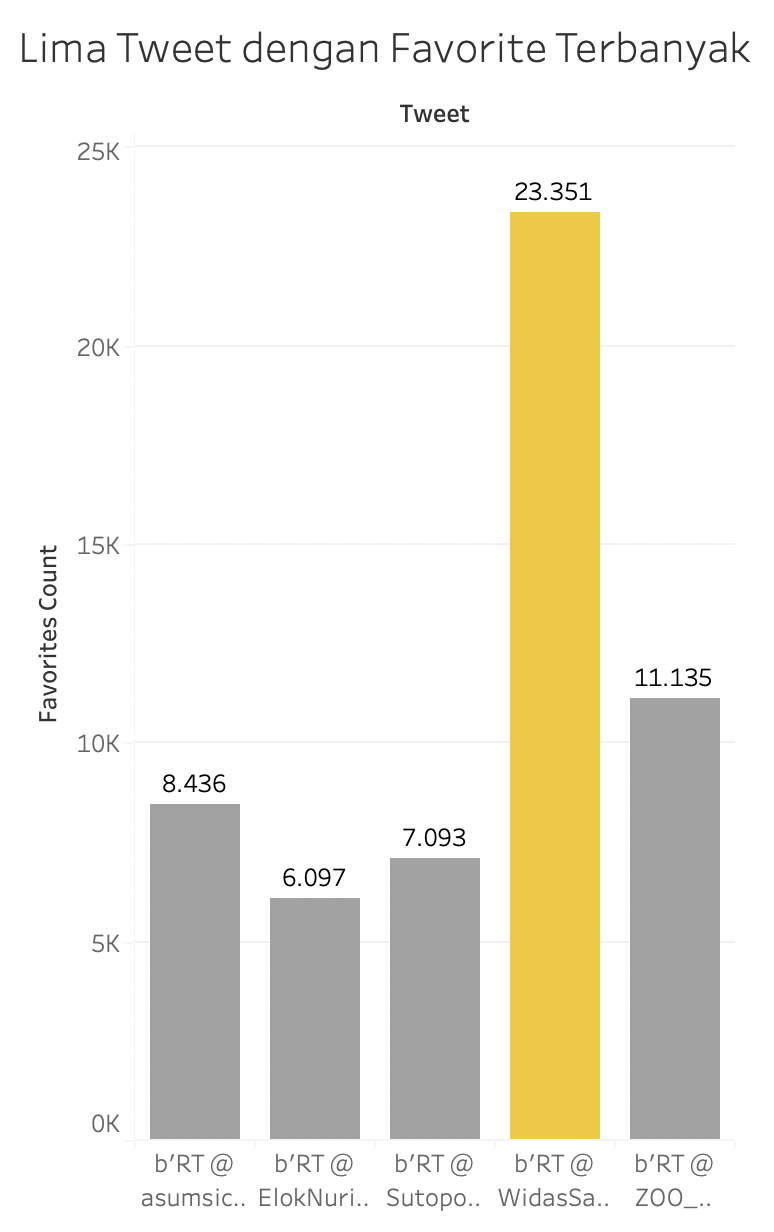

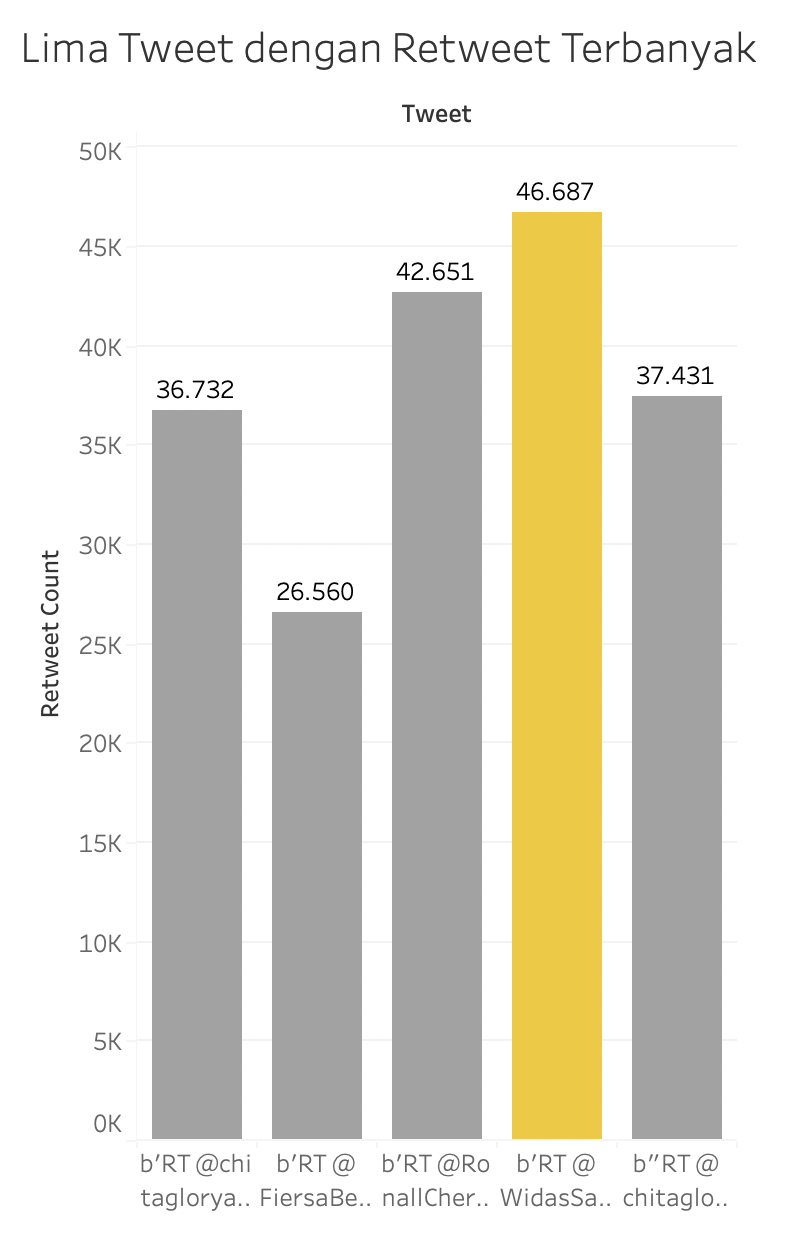

Dari chart di atas, diperoleh tweet dengan jumlah likes dan retweet terbanyak adalah tweet yang sama, yaitu tweet yang berisi mention kepada user @WidasSatyo. Tweet ini berisi "Al Fatihah buat mbak Rumini yg memilih bertahan dan menemani ibunya saat erupsi Semeru terjadi. Keduanya ditemukan wafat".

## **Sentiment Analysis**

Langkah selanjutnya adalah melakukan sentiment analysis untuk memperoleh sentimen masing - masing tweet mengenai keyword terkait: "erupsi", "gunung meletus", "semburan gunung", "semeru", dan "semeru erupsi"

In [ ]:
!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
dataclean['tweet_text_clean_eng'] = dataclean['tweet_text_clean_eng'].astype(str)

In [ ]:
dataclean['neg'] = dataclean['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neg'])
dataclean['neu'] = dataclean['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neu'])
dataclean['pos'] = dataclean['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['pos'])

In [ ]:
dataclean['compound_score'] = dataclean['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [ ]:
def sentimental_Score(score):
    if score >= 0.05:
        return 'positive'
    elif (score > -0.05) and (score < 0.05):
        return 'netral'
    elif score <= -0.05:
        return 'negative'

In [ ]:
dataclean['sentiment_type']=dataclean['compound_score'].apply(sentimental_Score)

In [ ]:
dataclean.to_csv('dataclean_sentiment.csv',index=False,sep=';',encoding='utf-8')

In [ ]:
hasilSA = pd.read_csv("https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/dataclean_sentiment.csv", encoding ='utf-8',sep=';' )

Sentimen untuk masing - masing tweet dapat dilihat di kolom sentiment_type

In [ ]:
hasilSA.head()

created_at  ... sentiment_type
0  16/12/2021 14:12  ...       negative
1  16/12/2021 14:11  ...       positive
2  16/12/2021 14:10  ...       positive
3  16/12/2021 14:09  ...       positive
4  16/12/2021 14:07  ...       negative

[5 rows x 11 columns]

In [ ]:
hasilSA['sentiment_type'].value_counts()

positive    13312
netral       8348
negative     7810
Name: sentiment_type, dtype: int64

Ringkasan sentimen seluruh tweet yang ditarik berdasarkan keyword "erupsi", "gunung meletus", "semburan gunung", "semeru", dan "semeru erupsi" dapat dilihat di atas. Diperoleh bahwa sentimen yang mendominasi adalah sentimen positif, dimana sentimen positif mencakup sebanyak 13312 tweet dari total 29470 tweet.

Visualisasi dalam grafik dapat dilihat dibawah ini. Visualisasi dibuat dengan bantuan sotfware Tableau.

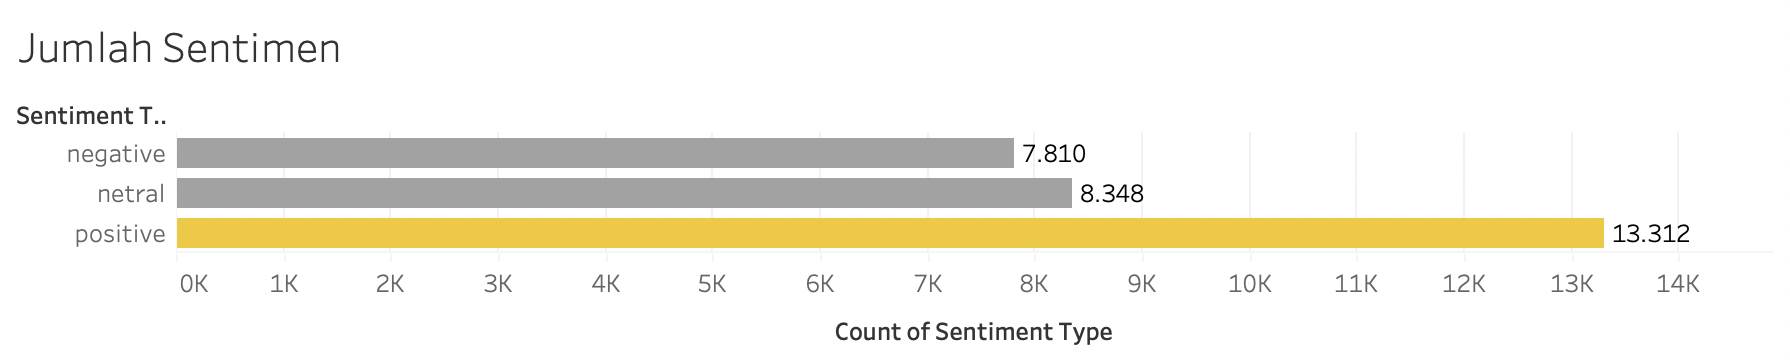

Dengan keterangan jumlah sentimen dapat juga dilihat hubungannya dengan jumlah likes dan retweet dengan bantuan software Tableau.

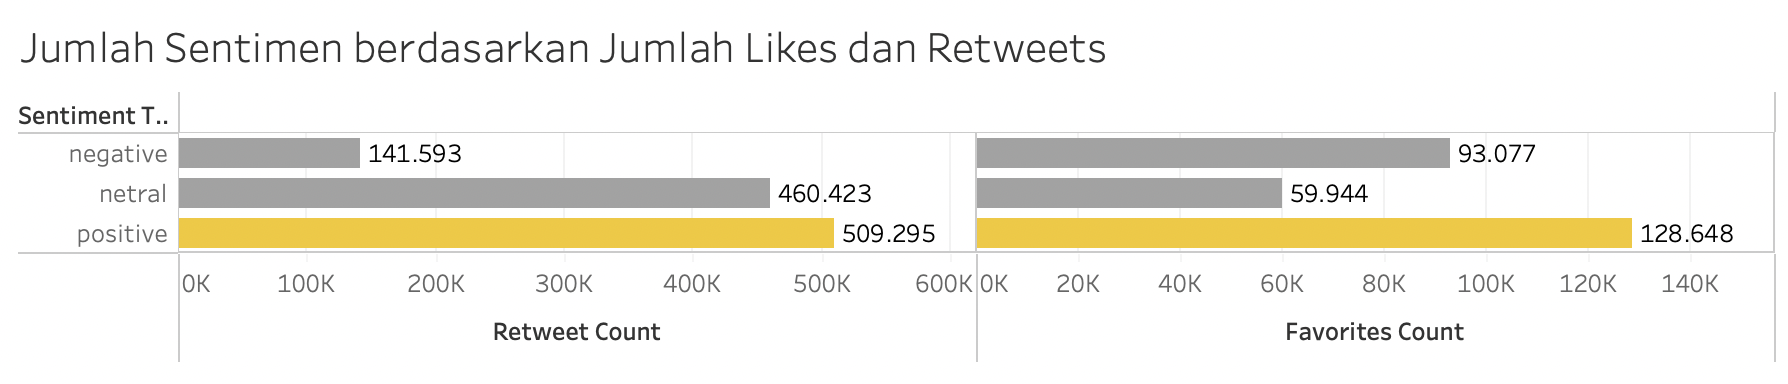


Dari visualisasi tersebut dapat dilihat bahwa sentimen yang bersifat positif memiliki jumlah retweets dan likes yang paling banyak, dengan jumlah 509.295 retweets dan 128.648 likes.

Dari kedua chart tersebut dapat dilihat sentimen yang mendominasi adalah sentimen positif, dapat terlihat kecenderungan bahwa tweet dengan sentimen positif lebih menarik perhatian publik dibandingan tweet dengan sentimen negatif dan netral berdasarkan jumlah likes dan retweet.

Walaupun tweet dengan sentimen negatif jumlahnya paling sedikit, namun jumlah likes yang diperoleh lebih banyak dibandingkan tweet dengan sentimen netral. 


Dengan keterangan waktu yang ada pada data, dapat juga dilihat visualisasi untuk jam dengan jumlah tweet terbanyak sebagai berikut.

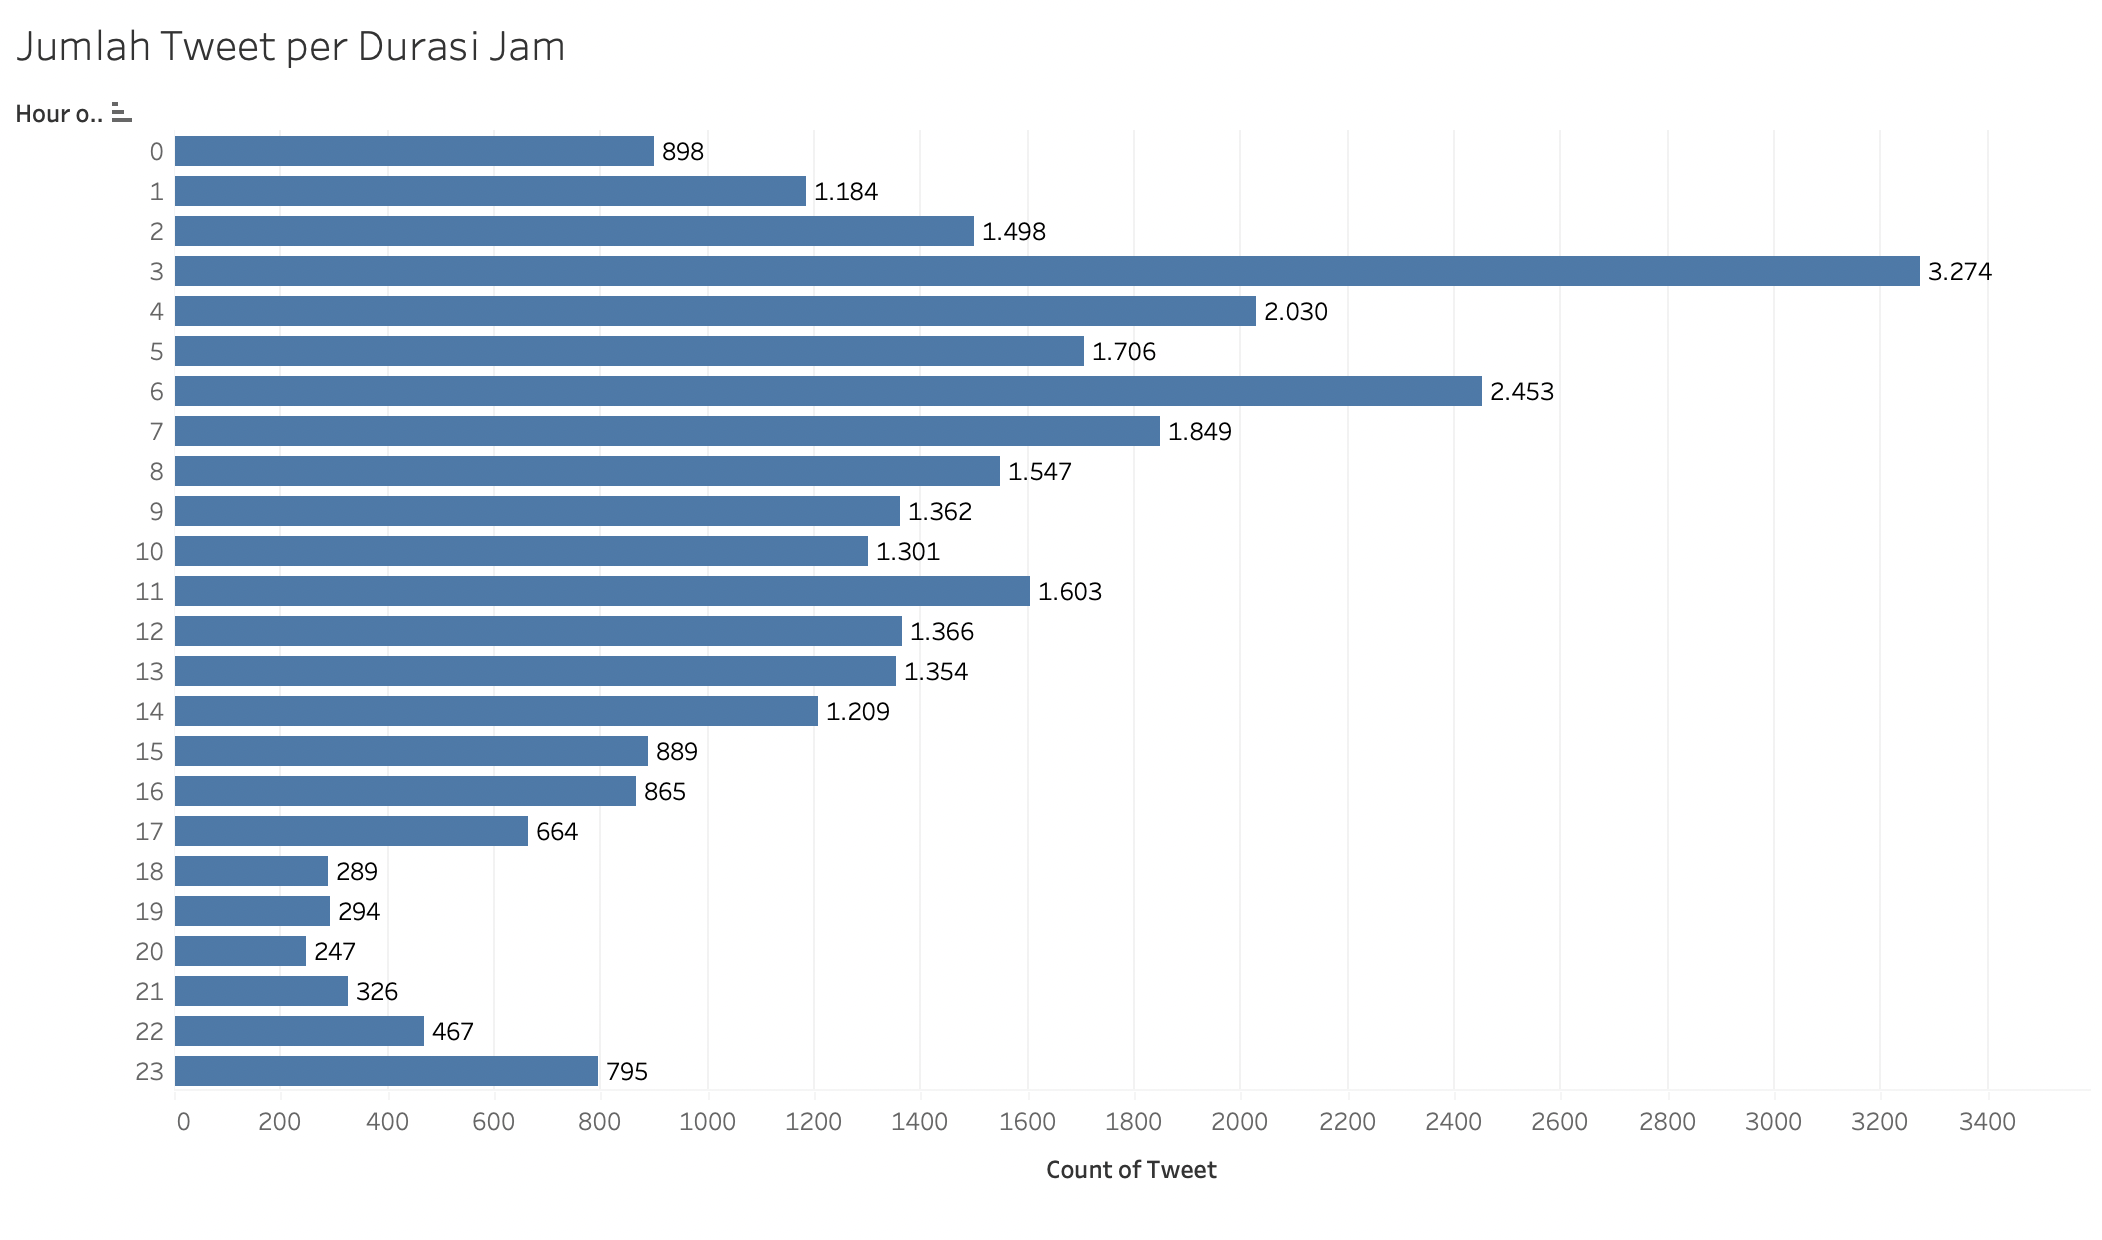

Dapat juga dilihat chart durasi dalam jumlah tweet berdasarkan sentimen.

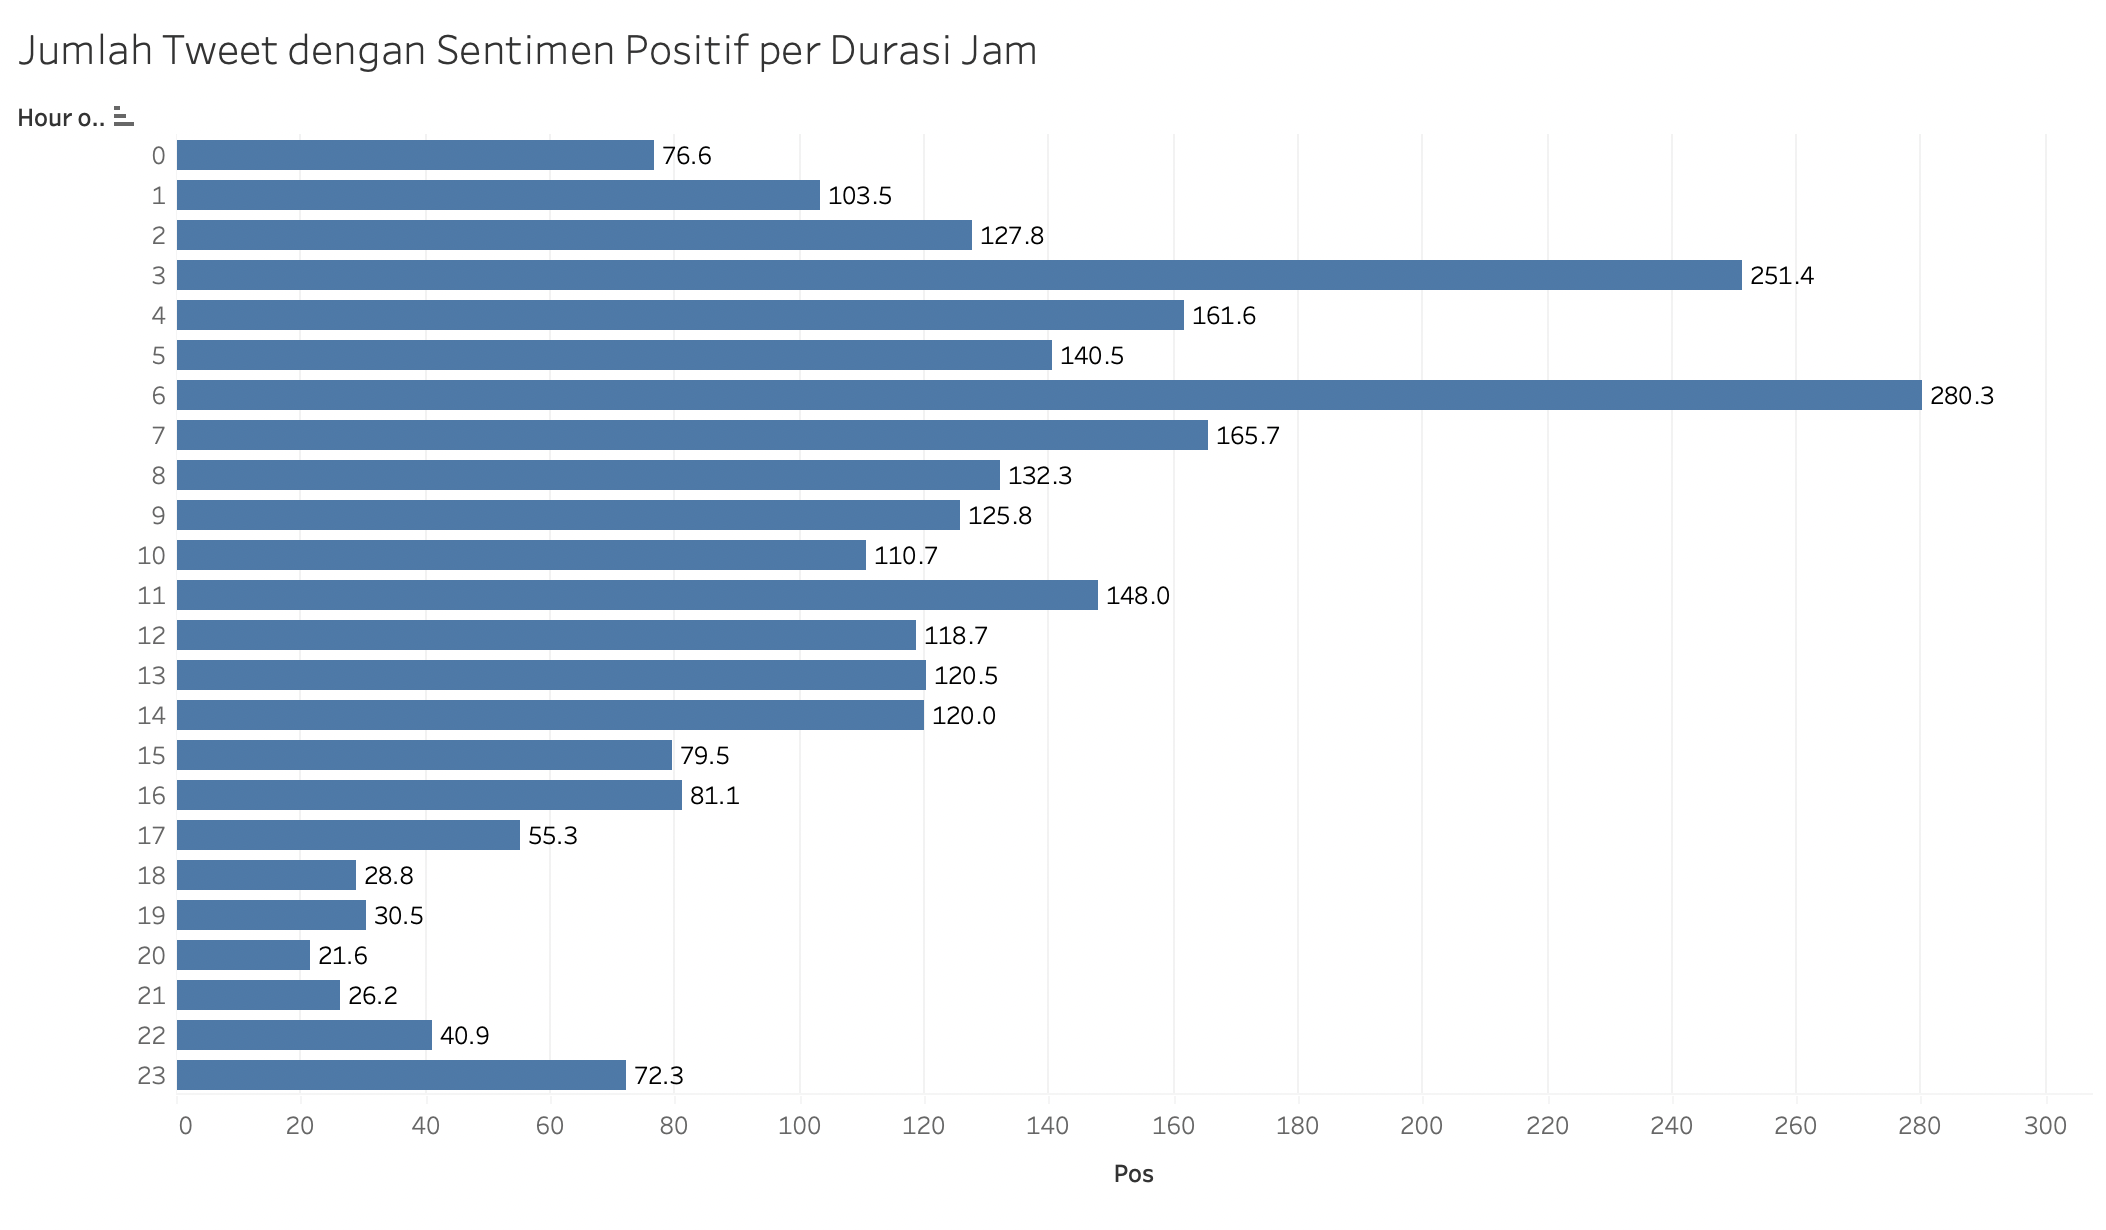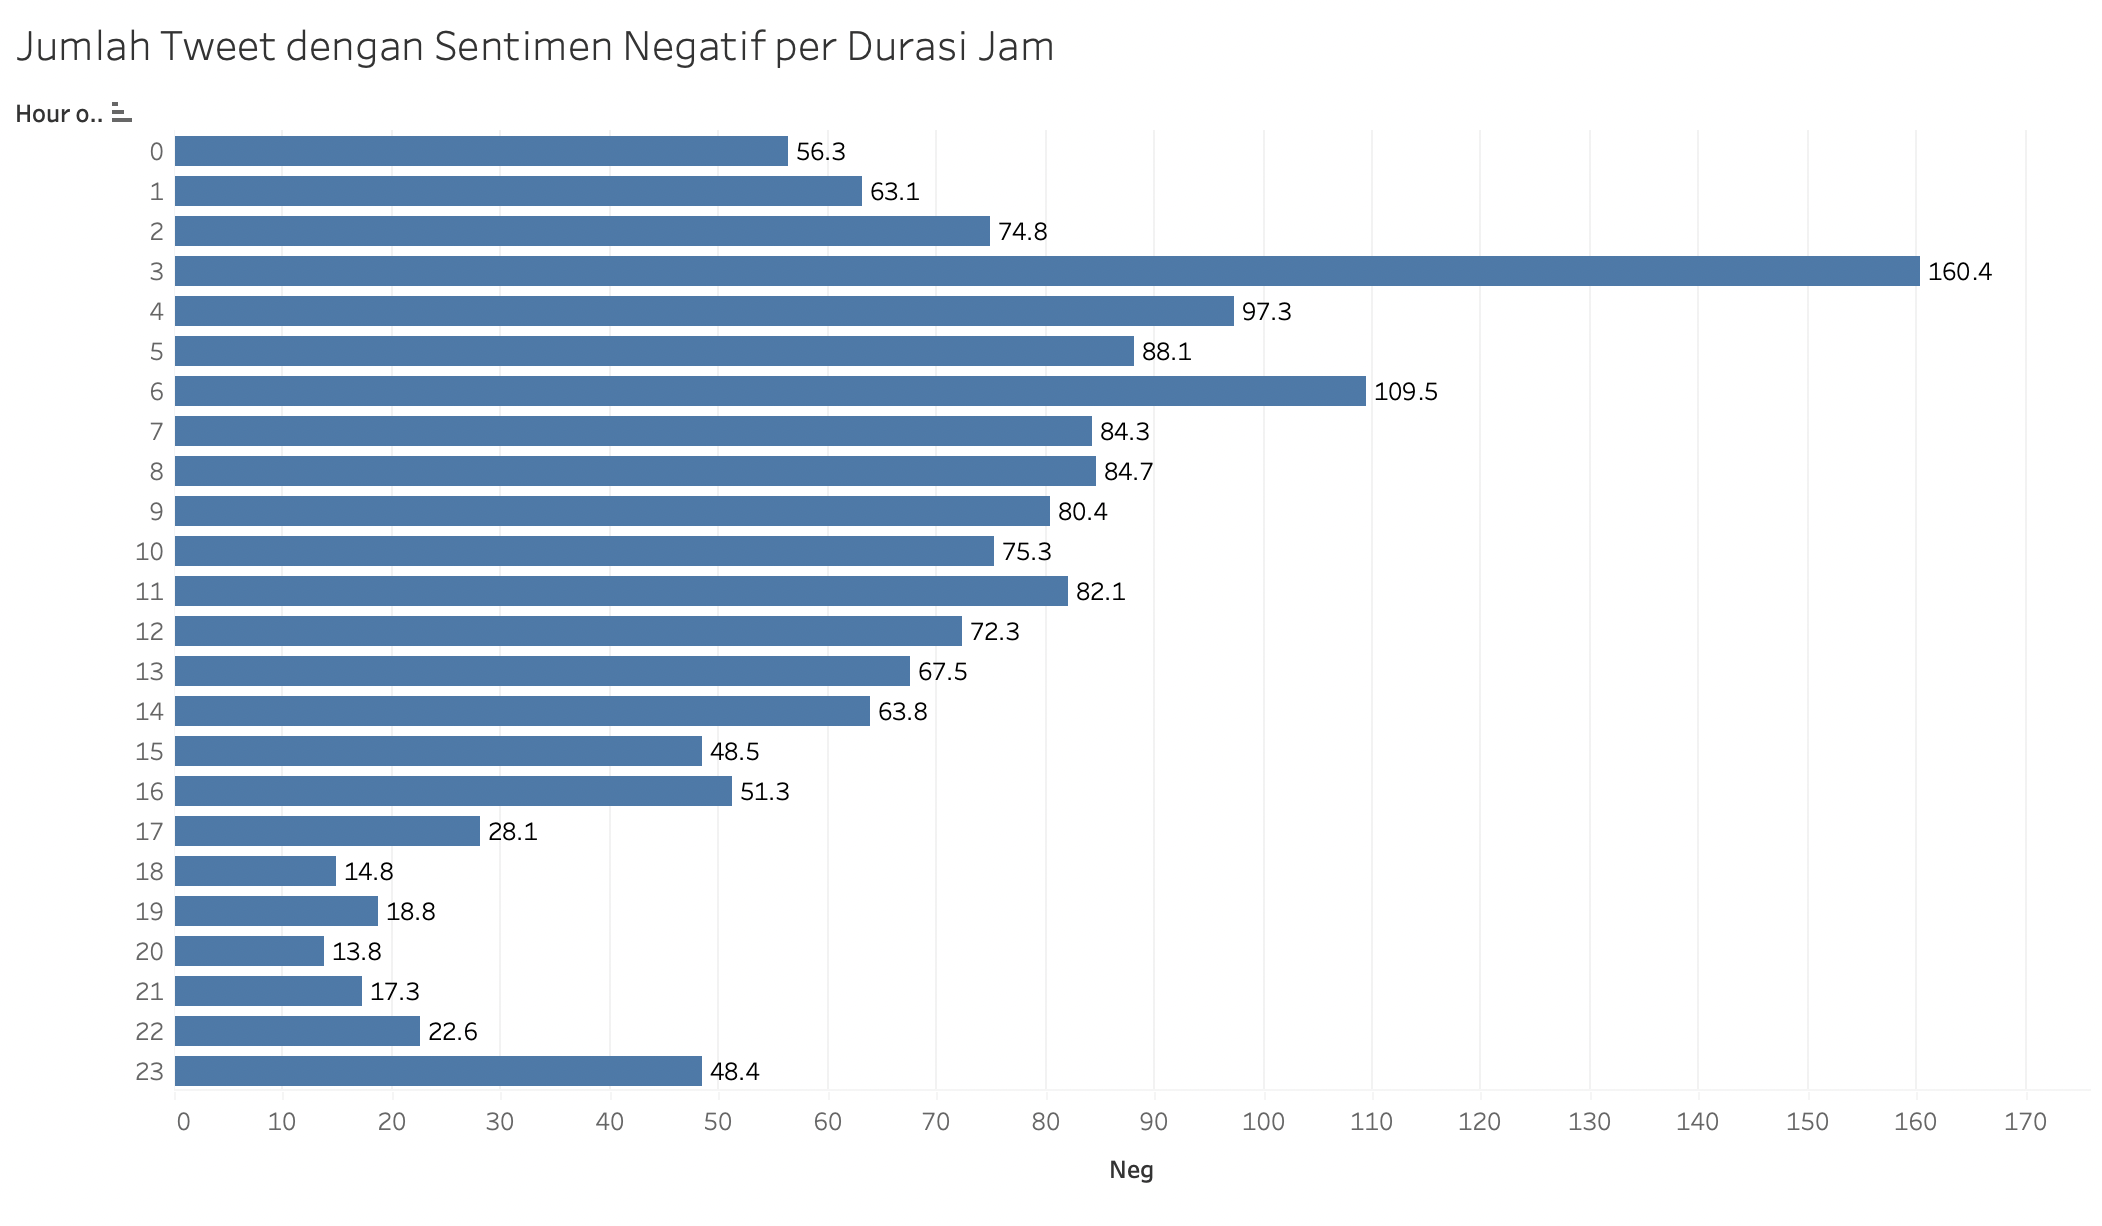

Dari tabel di atas, dapat dilihat bahwa secara keseluruhan, penggunaaan Twitter biasanya terjadi pada pukul 03.00 WIB. Oleh karena itu, hal ini dapat digunakan oleh pihak-pihak yang ingin menyampaikan informasi secara luas.

## **Visualisasi Kata Kunci**

Dengan bantuan Tools Voyant, dilakukan visualisasi terhadap keyword yang frekuensi disebutnya paling tinggi berdasarkan tweet yang berhasil dikumpulkan.

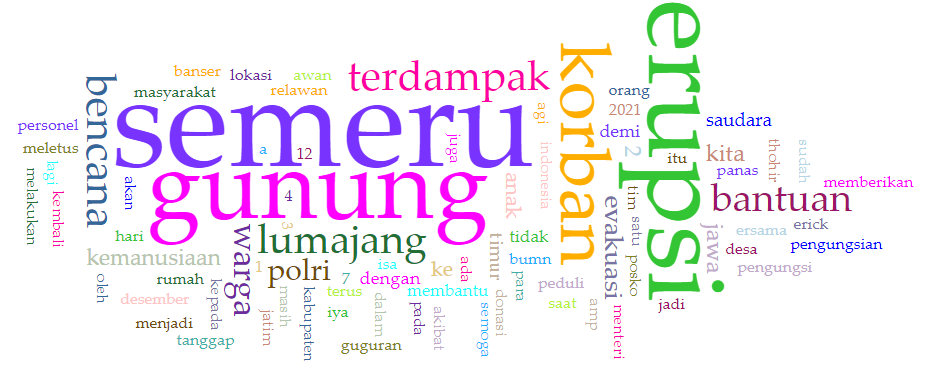

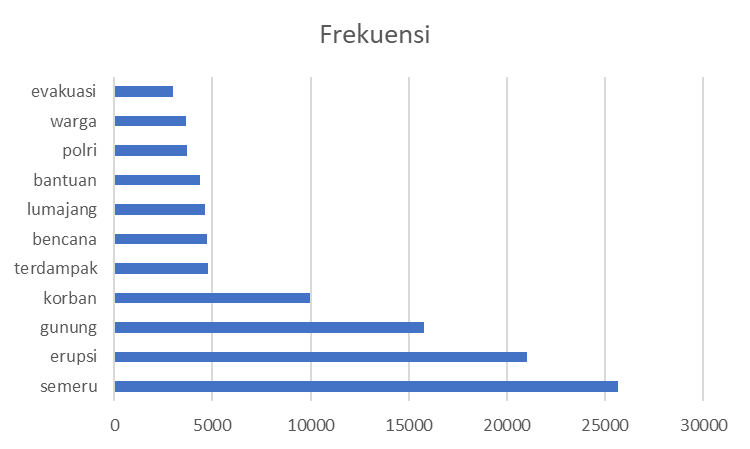

Berdasarkan chart di atas, diperoleh 11 kata kunci dengan frekuensi penyebutan terbanyak di tweet yang telah dikumpulkan. Perlu diketahui bahwa dilatarbelakangi terjadinya erupsi di Gunung Semeru pada 4 Desember 2021 lalu, secara subjektif kami mencurigai tweet-tweet terkait erupsi ada kaitannya dengan kejadian tersebut. Mengacu pada informasi tersebut, kami tertarik untuk meneliti lebih lanjut bagaimana reaksi publik terhadap beberapa keyword yang berkaitan dengan penanganan erupsi, yaitu keyword "korban", "bantuan", dan "evakuasi".

Untuk mengetahui respon publik terhadap keyword terkait penanganan erupsi tersebut, dilakukan kembali sentiment analysis pada data tweet yang mengandung keyword "korban", "bantuan", dan "evakuasi".

## **Sentiment Analysis: Kata Kunci Korban**

Kata kunci pertama yang berhubungan dengan penanganan erupsi adalah "korban". Dilakukan analisis sentimen terhadap tweet - tweet yang di dalamnya memiliki kata "korban". Proses analisis sentimen adalah sebagai berikut:

In [ ]:
SA_korban = pd.read_csv("https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/clean%20tweet%20per%20keywords/Clean_Tweet_Korban.csv", encoding ='utf-8',sep=';' )

In [ ]:
SA_korban.head()

created_at  ...                               tweet_text_clean_eng
0  16/12/2021 14:10  ...  pac ansor is always concerned about the erupti...
1  16/12/2021 14:05  ...  Friends of the Ministry of Home Affairs throug...
2  16/12/2021 14:03  ...  The relocation of the Semeru eruption newspape...
3  16/12/2021 14:03  ...  National Amil Zakat Agency, Baznas, handed ove...
4  16/12/2021 14:02  ...  Is there a tahlilan for the Semeru newspaper, ...

[5 rows x 6 columns]

In [ ]:
SA_korban = SA_korban.dropna(how='any',axis=0)

In [ ]:
SA_korban['tweet_text_clean_eng'] = SA_korban['tweet_text_clean_eng'].astype(str)

In [ ]:
SA_korban['neg'] = SA_korban['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neg'])
SA_korban['neu'] = SA_korban['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neu'])
SA_korban['pos'] = SA_korban['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['pos'])

In [ ]:
SA_korban['compound_score'] = SA_korban['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [ ]:
SA_korban['sentiment_type']=SA_korban['compound_score'].apply(sentimental_Score)

Sentimen untuk masing - masing tweet dapat dilihat di kolom sentiment_type

In [ ]:
SA_korban.head()

created_at  ... sentiment_type
0  16/12/2021 14:10  ...       positive
1  16/12/2021 14:05  ...       positive
2  16/12/2021 14:03  ...       positive
3  16/12/2021 14:03  ...         netral
4  16/12/2021 14:02  ...       positive

[5 rows x 11 columns]

In [ ]:
SA_korban['sentiment_type'].value_counts()

positive    4279
netral      3036
negative    1988
Name: sentiment_type, dtype: int64

Ringkasan sentimen seluruh tweet yang ditarik berdasarkan keyword "korban" dapat dilihat di atas. Diperoleh bahwa sentimen yang mendominasi adalah sentimen positif, dimana sentimen positif mencakup sebanyak 4279 tweet dari total 9303 tweet.

In [ ]:
SA_korban.to_csv('korban_18122021_sentiment.csv',index=False,sep=';',encoding='utf-8')

## **Sentiment Analysis: Kata Kunci Bantuan**

Kata kunci pertama yang berhubungan dengan penanganan erupsi adalah "bantuan". Dilakukan analisis sentimen terhadap tweet - tweet yang di dalamnya memiliki kata "bantuan". Proses analisis sentimen adalah sebagai berikut:

In [ ]:
SA_bantuan = pd.read_csv("https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/clean%20tweet%20per%20keywords/Clean_Tweet_Bantuan.csv", encoding ='utf-8',sep=';' )

In [ ]:
SA_bantuan.head()

created_at  ...                               tweet_text_clean_eng
0  16/12/2021 14:10  ...  pac ansor is always concerned about the erupti...
1  16/12/2021 14:03  ...  National Amil Zakat Agency, Baznas, handed ove...
2  16/12/2021 13:38  ...  Thank you to all who have provided assistance ...
3  16/12/2021 13:30  ...  together with BPBD and NU Care for Disaster Re...
4  16/12/2021 13:23  ...  the handover of donations for the Semeru erupt...

[5 rows x 6 columns]

In [ ]:
SA_bantuan = SA_bantuan.dropna(how='any',axis=0)

In [ ]:
SA_bantuan['tweet_text_clean_eng'] = SA_bantuan['tweet_text_clean_eng'].astype(str)

In [ ]:
SA_bantuan['neg'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neg'])
SA_bantuan['neu'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neu'])
SA_bantuan['pos'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['pos'])

In [ ]:
SA_bantuan['compound_score'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [ ]:
SA_bantuan['sentiment_type']=SA_bantuan['compound_score'].apply(sentimental_Score)

Sentimen untuk masing - masing tweet dapat dilihat di kolom sentiment_type

In [ ]:
SA_bantuan.head()

created_at  ... sentiment_type
0  16/12/2021 14:10  ...       positive
1  16/12/2021 14:03  ...         netral
2  16/12/2021 13:38  ...       positive
3  16/12/2021 13:30  ...       negative
4  16/12/2021 13:23  ...       negative

[5 rows x 11 columns]

In [ ]:
SA_bantuan['sentiment_type'].value_counts()

positive    1884
netral      1227
negative    1026
Name: sentiment_type, dtype: int64

Ringkasan sentimen seluruh tweet yang ditarik berdasarkan keyword "bantuan" dapat dilihat di atas. Diperoleh bahwa sentimen yang paling banyak adalah sentimen positif, dimana sentimen positif mencakup sebanyak 1884 tweet dari total 4137 tweet.

In [ ]:
SA_bantuan.to_csv('bantuan_18122021_sentiment.csv',index=False,sep=';',encoding='utf-8')

## **Sentiment Analysis: Kata Kunci Evakuasi**

Kata kunci pertama yang berhubungan dengan penanganan erupsi adalah "evakuasi". Dilakukan analisis sentimen terhadap tweet - tweet yang di dalamnya memiliki kata "evakuasi". Proses analisis sentimen adalah sebagai berikut:

In [ ]:
SA_evakuasi = pd.read_csv("https://raw.githubusercontent.com/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/main/clean%20tweet%20per%20keywords/Clean_Tweet_Evakuasi.csv", encoding ='utf-8',sep=';' )

In [ ]:
SA_evakuasi.head()

created_at  ...                               tweet_text_clean_eng
0  16/12/2021 14:09  ...  FPI Islamic Brotherhood Front volunteers evacu...
1  16/12/2021 14:01  ...  Nemo stands in front of a house covered in vol...
2  16/12/2021 13:52  ...  16 12 21 panic iof rescue team at the semeru e...
3  16/12/2021 13:36  ...  National Police personnel along with the SAR t...
4  16/12/2021 13:32  ...  Evacuation teams such as the FPI Laskar Disast...

[5 rows x 6 columns]

In [ ]:
SA_evakuasi = SA_evakuasi.dropna(how='any',axis=0)

In [ ]:
SA_evakuasi['tweet_text_clean_eng'] = SA_evakuasi['tweet_text_clean_eng'].astype(str)

In [ ]:
SA_evakuasi['neg'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neg'])
SA_evakuasi['neu'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['neu'])
SA_evakuasi['pos'] = SA_bantuan['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['pos'])

In [ ]:
SA_evakuasi['compound_score'] = SA_evakuasi['tweet_text_clean_eng'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [ ]:
SA_evakuasi['sentiment_type']=SA_evakuasi['compound_score'].apply(sentimental_Score)

Sentimen untuk masing - masing tweet dapat dilihat di kolom sentiment_type.

In [ ]:
SA_evakuasi.head()

created_at  ... sentiment_type
0  16/12/2021 14:09  ...       positive
1  16/12/2021 14:01  ...         netral
2  16/12/2021 13:52  ...       positive
3  16/12/2021 13:36  ...         netral
4  16/12/2021 13:32  ...       negative

[5 rows x 11 columns]

In [ ]:
SA_evakuasi['sentiment_type'].value_counts()

positive    1297
netral       890
negative     881
Name: sentiment_type, dtype: int64

Ringkasan sentimen seluruh tweet yang ditarik berdasarkan keyword "evakuasi" dapat dilihat di atas. Diperoleh bahwa sentimen yang paling banyak adalah sentimen positif, dimana sentimen positif mencakup sebanyak 1297 tweet dari total 3068 tweet.



In [ ]:
SA_evakuasi.to_csv('bantuan_18122021_sentiment.csv',index=False,sep=';',encoding='utf-8')



```
# This is formatted as code
```

#**Visualisasi dan Interpretasi Kata Kunci: Korban, Bantuan, dan Evakuasi**

Respon publik terkait kata kunci korban, bantuan, dan evakuasi divisualisasikan dengan bantuan Ms. Excel.

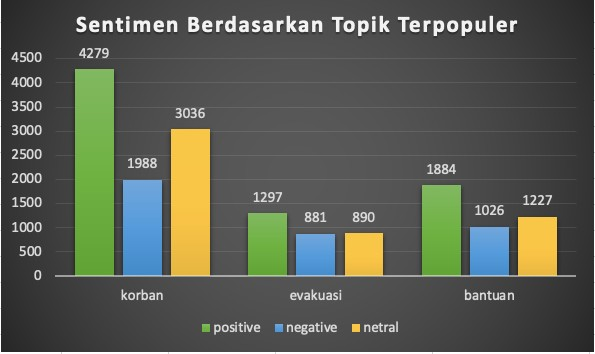

Berdasarkan chart tersebut, didapatkan bahwa sentimen publik (berdasarkan tweet) terhadap kata kunci bantuan, korban, dan evakuasi **didominasi oleh sentimen positif**. Oleh karena itu, dapat diinterpretasikan bahwa evakuasi dan bantuan yang disalurkan kepada korban bencana erupsi cenderung sudah cukup tanggap sehingga mendapat respon positif dari masyarakat. 

Namun, dapat dilihat bahwa respon netral maupun negatif sebenarnya cukup banyak untuk setiap kata kunci "bantuan", "korban", dan "evakuasi". Hal ini mengindikasikan bahwa walaupun sentimen paling banyak adalah sentimen positif, masih terdapat ruang untuk para penanggung jawab penanganan erupsi untuk dapat meningkatkan kinerja mereka terkait evakuasi dan pemberian bantuan kepada korban. Hal ini dapat menjadi rekomendasi kedepannya. Harapannya, bencana apapun yang melanda Indonesia mampu ditangani dengan baik oleh para penanggung jawab sehingga diperoleh respon dan umpan balik yang positif dari masyarakat.

## **Kesimpulan**

1. Berdasarkan keyword "erupsi", "gunung meletus", "semburan gunung", "semeru", dan "semeru erupsi", sentimen yang mendominasi adalah sentimen positif. 
2. Dapat terlihat kecenderungan bahwa tweet dengan sentimen positif lebih menarik perhatian publik dibandingan tweet dengan sentimen negatif dan netral berdasarkan jumlah likes dan retweet.
3. Dilakukan sentimen analisis terhadap tweet yang mengandung kata kunci korban, evakuasi, dan bantuan. Untuk ketiga kata kunci tersebut, sentimen positif mendominasi. Hasil tersebut mengindikasikan bahwa evakuasi dan bantuan yang disalurkan kepada korban bencana erupsi cenderung sudah cukup tanggap, sehingga mendapat respon positif dari masyarakat. Namun, sentimen yang netral dan negatif ada dan tidak bisa diabaikan. Artinya, masih terdapat ruang untuk para penanggung jawab penanganan erupsi untuk dapat meningkatkan kinerja terkait evakuasi dan pemberian bantuan kepada korban. Hal ini dapat menjadi rekomendasi kedepannya.dengan tujuan memperoleh umpan balik yang positif dari masyarakat.
